**Статистический анализ данных популярного сервиса аренды самокатов `GoFast`**

***Описание проекта***

Чтобы совершать поездки по городу, пользователи сервиса `GoFast` пользуются мобильным приложением. Сервисом можно пользоваться:
- без подписки
  - абонентская плата отсутствует;
  - стоимость одной минуты поездки — 8 рублей;
  - стоимость старта (начала поездки) — 50 рублей;
- с подпиской Ultra
  - абонентская плата — 199 рублей в месяц;
  - стоимость одной минуты поездки — 6 рублей;
  - стоимость старта — бесплатно.

***Цель проекта***

Перед нами стоит задача: проанализировать данные о некоторых пользователях из нескольких городов и об их поездках. Проверить некоторые гипотезы, которые помогут бизнесу.

***Описание данных***

В основных данных есть информация о пользователях, их поездках и подписках.
Пользователи — `users_go.csv`

| <!-- -->   | <!-- -->   |
|----------|----------|
| user_id | уникальный идентификатор пользователя |
| name | имя пользователя |
| age | возраст |
| city | город |
| subscription_type |	тип подписки (free, ultra) |

Поездки — `rides_go.csv`

| <!-- -->   | <!-- -->   |
|:---------|:---------|
|user_id | уникальный идентификатор пользователя |
|distance | расстояние, которое пользователь проехал в текущей сессии (в метрах) |
| duration | продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку» |
| date | дата совершения поездки |

Подписки — `subscriptions_go.csv`

| <!-- -->   | <!-- -->   |
|----------|----------|
| subscription_type | тип подписки |
| minute_price | стоимость одной минуты поездки по данной подписке |
| start_ride_price | стоимость начала поездки |
| subscription_fee | стоимость ежемесячного платежа |

***План работы***

1. Загрузка данных
2. Предобработка данных
3. Исследовательский анализ данных
4. Объединение данных
5. Подсчёт выручки
6. Проверка гипотез
7. Распределения

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
from scipy.stats import binom
from matplotlib import pyplot

#### Шаг 1. Загрузка данных

In [2]:
users_data = pd.read_csv('/datasets/users_go.csv')
users_data

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
...,...,...,...,...,...
1560,829,Федор,29,Пятигорск,free
1561,809,Юрий,26,Сочи,free
1562,307,Ясмина,19,Краснодар,ultra
1563,47,Юрий,28,Тюмень,ultra


In [3]:
rides_data = pd.read_csv('/datasets/rides_go.csv')
rides_data

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04
18064,1534,2840.423057,21.409799,2021-11-16
18065,1534,3826.185507,18.435051,2021-11-18
18066,1534,2902.308661,16.674362,2021-11-27


In [4]:
subscriptions_data = pd.read_csv('/datasets/subscriptions_go.csv')
subscriptions_data

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


#### Шаг 2. Предобработка данных

In [5]:
users_data.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [6]:
rides_data.isna().sum()

user_id     0
distance    0
duration    0
date        0
dtype: int64

In [7]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [8]:
rides_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [9]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


В таблице `users_data` 1565 записей, 5 столбцов. Изменение типов данных не требуется

In [10]:
rides_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


В таблице `rides_data` 18068 записей, 4 столбцов. Необходимо поменять тип данных столбца `date` на тип данных даты

In [11]:
subscriptions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


В таблице `subscriptions_data` 2 записи, 4 столбца. Изменение типов данных не требуется

**2.1 Приведите столбец date к типу даты pandas.**

In [12]:
rides_data['date'] = pd.to_datetime(rides_data['date'])
rides_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


**2.2 Создайте новый столбец с номером месяца на основе столбца `date`.**

In [13]:
rides_data['month'] = rides_data['date'].dt.month 
rides_data

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8
...,...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04,11
18064,1534,2840.423057,21.409799,2021-11-16,11
18065,1534,3826.185507,18.435051,2021-11-18,11
18066,1534,2902.308661,16.674362,2021-11-27,11


In [14]:
rides_data['date'].dt.year.unique()

array([2021])

In [15]:
sorted(rides_data['date'].dt.month.unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

В таблице `rides_data` представлены наблюдения за 2021 год на протяжении всех месяцев

**2.3 Проверьте наличие пропущенных значений и дубликатов в датафреймах. Обработайте их, если такие значения присутствуют.**

In [16]:
rides_data[rides_data.duplicated()]

,user_id,distance,duration,date,month


In [17]:
users_data[users_data.duplicated()].shape

(31, 5)

In [18]:
users_data.drop_duplicates(inplace=True)

In [19]:
users_data[users_data.duplicated()]

,user_id,name,age,city,subscription_type


В таблицах `rides_data` `subscriptions_data` дубликатов выявлено не было, однако в таблице `users_data` дубликаты был выявлен 31 дубликат, поэтому они были обработаны

#### Шаг 3. Исследовательский анализ данных

**Опишите и визуализируйте общую информацию о пользователях и поездках:**

**3.1 частота встречаемости городов**

<AxesSubplot:>

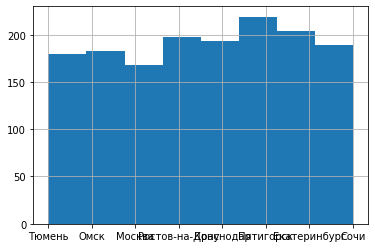

In [20]:
users_data['city'].hist(bins=8)

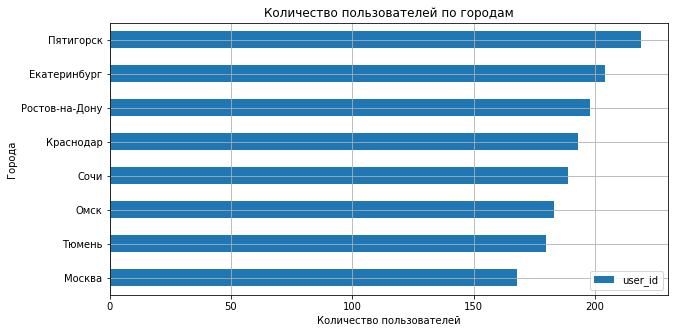

In [21]:
(
    users_data.pivot_table(index='city', values='user_id', aggfunc='count').sort_values(by='user_id', ascending=True)
    .plot(kind='barh', grid=True, figsize=(10, 5))
)
plt.title('Количество пользователей по городам')
plt.ylabel('Города')
plt.xlabel('Количество пользователей')

plt.show()

In [22]:
print('Количество пользователей по городам ') 
users_data.pivot_table(index='city', values='user_id', aggfunc='count').sort_values(by='user_id', ascending=False)

Количество пользователей по городам 


,user_id
city,
Пятигорск,219
Екатеринбург,204
Ростов-на-Дону,198
Краснодар,193
Сочи,189
Омск,183
Тюмень,180
Москва,168


Чаще всего встречаются люди, проживающие в Пятигорске, реже в Екатеринбурге и Ростове-на-Дону, завершают список люди, проживающие в Москве. Исходя из этих данных, можно сделать вывод, что первенство занимают в основном южные города, исключением является Екатеринбург.

**3.2 соотношение пользователей с подпиской и без подписки;**

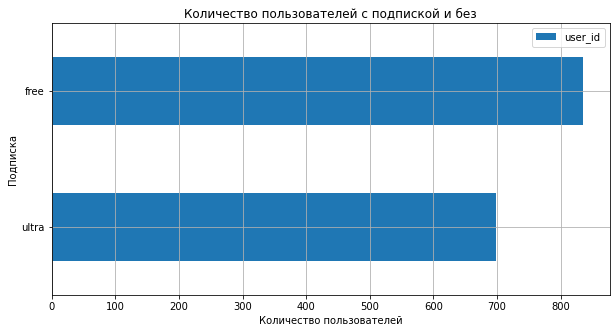

In [23]:
(
    users_data.pivot_table(index='subscription_type', values='user_id', aggfunc='count').sort_values(by='user_id', ascending=True)
    .plot(kind='barh', grid=True, figsize=(10, 5))
)
plt.title('Количество пользователей с подпиской и без')
plt.ylabel('Подписка')
plt.xlabel('Количество пользователей')

plt.show()

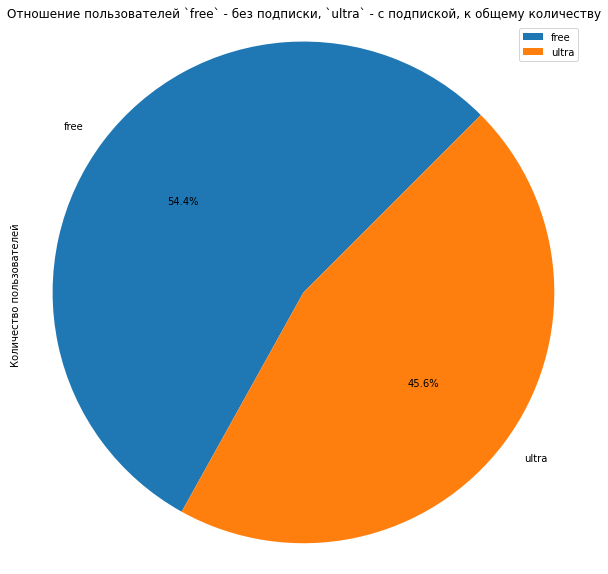

In [24]:
(
    users_data.pivot_table(index='subscription_type', values='user_id', aggfunc='count')
    .plot.pie(y='user_id', figsize=(10,10),  label='Количество пользователей', 
    autopct='%1.1f%%', startangle=45,
    title='Отношение пользователей `free` - без подписки, `ultra` - с подпиской, к общему количеству')

)
plt.axis('equal')
plt.show()

In [25]:
print('Количество пользователей с подпиской') 
users_data.pivot_table(index='subscription_type', values='user_id', aggfunc='count').sort_values(by='user_id', ascending=False)

Количество пользователей с подпиской


,user_id
subscription_type,
free,835
ultra,699


Из полученных данных можно сделать вывод, что людей без подписки больше, чем с ней.

**3.3 возраст пользователей;**

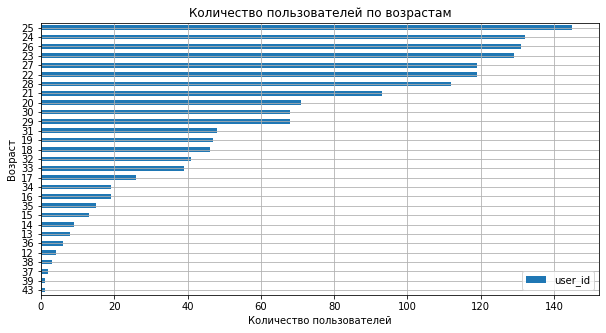

In [26]:
(
    users_data.pivot_table(index='age', values='user_id', aggfunc='count').sort_values(by='user_id', ascending=True)
    .plot(kind='barh', grid=True, figsize=(10, 5))
)
plt.title('Количество пользователей по возрастам')
plt.ylabel('Возраст')
plt.xlabel('Количество пользователей')

plt.show()

In [27]:
print('Возраст пользователей') 
users_data.pivot_table(index='age', values='user_id', aggfunc='count').sort_values(by='user_id', ascending=False)

Возраст пользователей


,user_id
age,
25,145
24,132
26,131
23,129
27,119
22,119
28,112
21,93
20,71


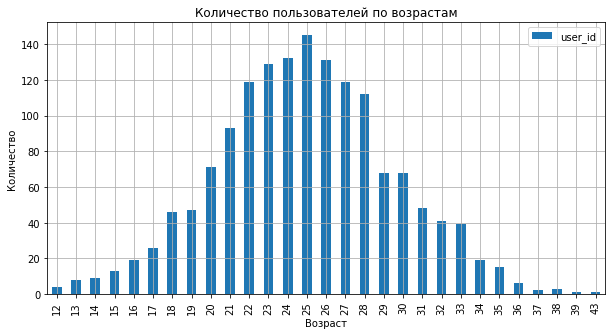

In [28]:
(
    users_data.pivot_table(index='age', values='user_id', aggfunc='count').sort_values(by='age', ascending=True)
    .plot(kind='bar' , grid=True, figsize=(10, 5))
)
plt.title('Количество пользователей по возрастам')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

Визуализация количества пользователей в зависимости от возраста указывает, что средний возраст потребителя услуги подчиняется нормальному распределению с медианой примерно в 25 лет, при этом средний возраст и медиана практически совпадают.

In [29]:
users_data['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

Средний возраст потребителя услуги подчиняется нормальному распределению с медианой примерно в 25 лет, при этом средний возраст и медиана практически совпадают

**3.4 расстояние, которое пользователь преодолел за одну поездку;**

<AxesSubplot:>

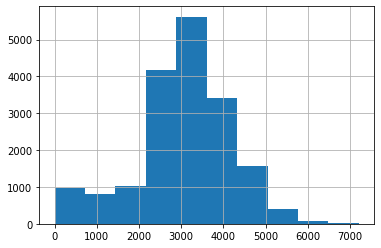

In [30]:
rides_data['distance'].hist()

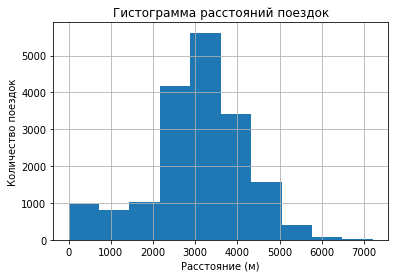

In [31]:
rides_data['distance'].hist()
plt.title('Гистограмма расстояний поездок')
plt.xlabel('Расстояние (м)')
plt.ylabel('Количество поездок')
plt.show()

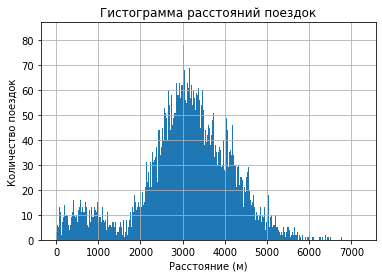

In [32]:
rides_data['distance'].hist(bins=1000)
plt.title('Гистограмма расстояний поездок')
plt.xlabel('Расстояние (м)')
plt.ylabel('Количество поездок')
plt.show()

In [33]:
rides_data['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

Исходя из гистограммы можно заметить, что распределение напоминает нормальное, однако слева есть некий всплеск слева где-то на 700 метрах. Также можно заметить, что среднее расстояние почти совпадает с медианой

Исходя из этой гистограммы можно сделать вывод, что в основном пользователи ездят на дистанции от 3000 метров до 4000 метров

**3.5 продолжительность поездок.**

<AxesSubplot:>

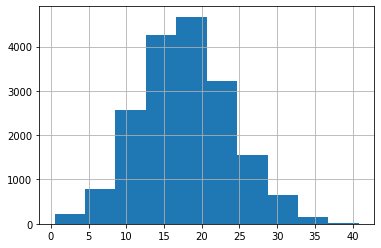

In [34]:
rides_data['duration'].hist()

Распределение напоминает нормальное. В основном продолжительность поездок занимает 20 минут.

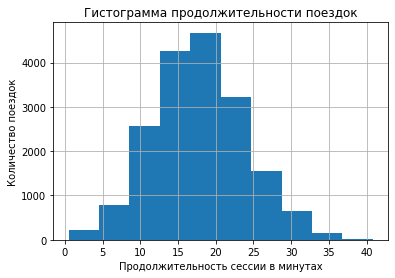

In [35]:
rides_data['duration'].hist()
plt.title('Гистограмма продолжительности поездок')
plt.xlabel('Продолжительность сессии в минутах')
plt.ylabel('Количество поездок')
plt.show()

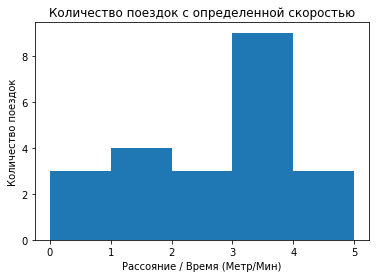

Максимальная скорость перемещения (метр/мин) 14422.015489197038


In [36]:
plt.hist(rides_data['distance'] / rides_data['duration'],bins=5, range=(0,5))
plt.title('Количество поездок с определенной скоростью')
plt.xlabel('Рассояние / Время (Метр/Мин)')
plt.ylabel('Количество поездок')
plt.show()

print('Максимальная скорость перемещения (метр/мин)', (rides_data['distance'] / rides_data['duration']).max())

In [37]:
(rides_data['distance'] / rides_data['duration']).describe()

count    18068.000000
mean       229.754352
std        735.936479
min          0.085552
25%        135.464046
50%        170.852249
75%        215.496668
max      14422.015489
dtype: float64

#### Шаг 4. Объединение данных

**4.1 Объедините данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуйтесь методом `merge()`.**

In [38]:
data = pd.merge(users_data, rides_data, on='user_id')
data = pd.merge(data, subscriptions_data, on='subscription_type')
data

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


In [39]:
print('Количество явных дубликатов в `df` = ', data.duplicated().sum(), '\n')
data.info()

Количество явных дубликатов в `df` =  0 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ M

In [40]:
if rides_data.shape[0] == data.shape[0]:
    print('Данные не были потеряны и лишние записи не были добавлены')
else:
    print('Что-то пошло не так')

Данные не были потеряны и лишние записи не были добавлены


In [41]:
data.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Объединение прошло корректно, данные не были потеряны, а также лишние записи не были добавлены. Количество записей с одной из исходных таблиц совпадает. Пропусков и дубликатов нет.

**4.2 Создайте ещё два датафрейма из датафрейма, созданного на этапе 4.1:**
- c данными о пользователях без подписки;
- с данными о пользователях с подпиской.

In [42]:
data_free = data[data['subscription_type'] == 'free']
data_free

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


In [43]:
data_ultra = data[data['subscription_type'] == 'ultra']
data_ultra

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3973.046497,24.671163,2021-08-29,8,6,0,199
6496,699,Оксана,22,Москва,ultra,3288.702563,15.892886,2021-09-12,9,6,0,199
6497,699,Оксана,22,Москва,ultra,3076.159348,14.389525,2021-09-26,9,6,0,199
6498,699,Оксана,22,Москва,ultra,4707.845501,15.839579,2021-10-17,10,6,0,199


In [44]:
if data.shape[0] == (data_free.shape[0] + data_ultra.shape[0]):
    print('Разделение прошло успешно')
else:
    print('Что-то пошло не так')

Разделение прошло успешно


Разделение прошло успешно, совокупный размер датафреймов совпадает с количеством строк в исходной таблице.

**4.3 Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий.**

<AxesSubplot:>

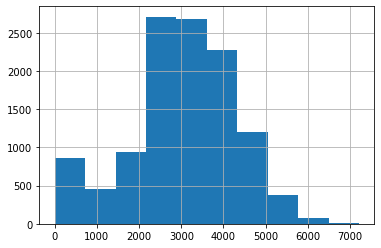

In [45]:
data_free['distance'].hist()

<AxesSubplot:>

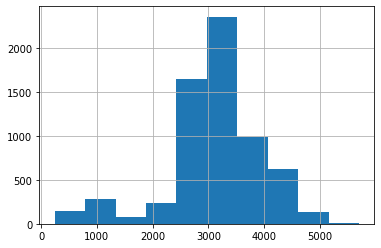

In [46]:
data_ultra['distance'].hist()

In [47]:
data_free['distance'].describe()

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

In [48]:
data_ultra['distance'].describe()

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

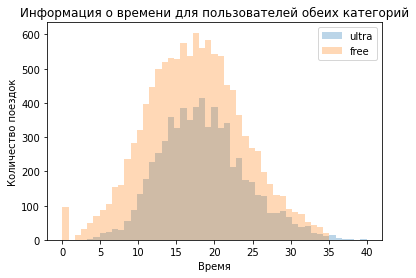

In [49]:
bins = np.linspace(0, 40)

pyplot.hist(data_ultra['duration'], bins, alpha=0.3, label='ultra')
pyplot.hist(data_free['duration'], bins, alpha=0.3, label='free')
pyplot.legend(loc='upper right')
pyplot.title('Информация о времени для пользователей обеих категорий')
pyplot.xlabel('Время')
pyplot.ylabel('Количество поездок')
pyplot.show()


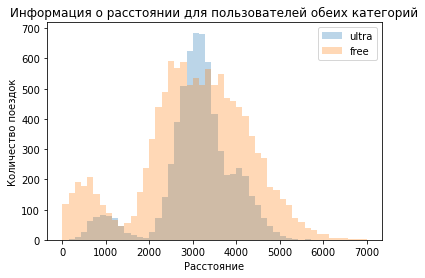

In [50]:
bins = np.linspace(0, 7000)

pyplot.hist(data_ultra['distance'], bins, alpha=0.3, label='ultra')
pyplot.hist(data_free['distance'], bins, alpha=0.3, label='free')
pyplot.legend(loc='upper right')
pyplot.title('Информация о расстоянии для пользователей обеих категорий')
pyplot.xlabel('Расстояние')
pyplot.ylabel('Количество поездок')
pyplot.show()


In [51]:
data_ultra['distance'].describe()

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

In [52]:
data_free['distance'].describe()

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

In [53]:
data_free['duration'].describe()

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

In [54]:
data_ultra['duration'].describe()

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

Исходя из гистограммы о времени для пользователей обеих категорий можно сделать вывод, что люди без подписки трятят больше времени на поездку, чем люди с подпиской `ultra`.

Если рассматривать гистограмму с информацией о расстоянии для польлзователей обеих категорий, то можно сделать вывод, что пользователи с подпиской `ultra` ездят на бОльшие расстояние, нежели пользователи без подписки.

Исходя из описательной статистики, можно сделать вывод, что разброс по расстоянию у людей с подпиской меньше, чем у людей без нее. Также можно заметить, что наличие подписки влияет на среднее расстояние: с подпиской оно равно `3115.445388`, а без нее - `3045.495282`.

#### Шаг 5. Подсчёт выручки

**5.1 Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.**

In [55]:
data['duration'] = np.ceil(data['duration'])
data['duration'].head()

0    26.0
1    16.0
2     7.0
3    19.0
4    27.0
Name: duration, dtype: float64

In [56]:
data_agg = data.pivot_table(
    index=('user_id', 'month'),
    values=(
        'distance', 
        'duration', 
        'minute_price', 
        'start_ride_price', 
        'subscription_fee'
    ), 
    aggfunc=({'distance':{'count', 'sum'}, 
             'duration':'sum',
             'minute_price': 'mean',
             'start_ride_price':'mean',
             'subscription_fee':'mean',})
)
data_agg.columns = [
    'count', 
    'distance', 
    'duration', 
    'minute_price',
    'start_ride_price', 
    'subscription_fee'
]
data_agg

count      distance  duration  minute_price  start_ride_price  \
user_id month                                                                  
1       1          2   7027.511294      42.0             6                 0   
        4          1    754.159807       7.0             6                 0   
        8          2   6723.470560      46.0             6                 0   
        10         2   5809.911100      32.0             6                 0   
        11         3   7003.499363      56.0             6                 0   
...              ...           ...       ...           ...               ...   
1534    6          2   3409.468534      26.0             8                50   
        8          2   7622.453034      48.0             8                50   
        9          1   4928.173852      23.0             8                50   
        11         4  13350.015305      78.0             8                50   
        12         1   2371.711192      16.0             8                50   

               subscription_fee  
user_id month                    
1       1                   199  
        4                   199  
        8                   199  
        10                  199  
        11                  199  
...                         ...  
1534    6                     0  
        8                     0  
        9                     0  
        11                    0  
        12                    0  

[11331 rows x 6 columns]

**5.2 В этот же датафрейм добавьте столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратитесь к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа: например, значения 25.3, 25.5 и 26.0 должны быть преобразованы к 26.**

In [58]:
data_agg['revenue'] = (
data_agg['start_ride_price']*data_agg['count']+
data_agg['minute_price']*data_agg['duration']+
data_agg['subscription_fee'])
data_agg

count      distance  duration  minute_price  start_ride_price  \
user_id month                                                                  
1       1          2   7027.511294      42.0             6                 0   
        4          1    754.159807       7.0             6                 0   
        8          2   6723.470560      46.0             6                 0   
        10         2   5809.911100      32.0             6                 0   
        11         3   7003.499363      56.0             6                 0   
...              ...           ...       ...           ...               ...   
1534    6          2   3409.468534      26.0             8                50   
        8          2   7622.453034      48.0             8                50   
        9          1   4928.173852      23.0             8                50   
        11         4  13350.015305      78.0             8                50   
        12         1   2371.711192      16.0             8                50   

               subscription_fee  revenue  
user_id month                             
1       1                   199    451.0  
        4                   199    241.0  
        8                   199    475.0  
        10                  199    391.0  
        11                  199    535.0  
...                         ...      ...  
1534    6                     0    308.0  
        8                     0    484.0  
        9                     0    234.0  
        11                    0    824.0  
        12                    0    178.0  

[11331 rows x 7 columns]

In [59]:
data_agg['revenue'].sum()

3878641.0

Таким образом выручка составила `3853677.0` рублей

#### Шаг 6. Проверка гипотез

**6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.**

Выдвинем гипотезы:

Н0: Средняя продолжительность поездок с подпиской `ultra` и без - `free` равна

Н1: Средняя продолжительность поездок с подпиской `ultra` больше продолжительности поездок без подписок - `free`

In [60]:
results = st.ttest_ind(
    data_ultra['duration'], 
    data_free['duration'], 
    equal_var=True, 
    alternative='greater')
print(results.pvalue)

alpha = 0.05
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.2804098316645618e-34
Отвергаем нулевую гипотезу


Нулевая гипотеза отвергнута, есть основания полагать, что средняя продолжительность поездки с подпиской больше продолжительности поездок без подписки при установленном уровне значимости в 5 %

**6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.**

Выдвинем гипотезы:

Н0: Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку равно 3130 метров

Н1: Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку больше на 3130 метров

In [61]:
distance = 3130
alpha = 0.05
results = st.ttest_1samp(
    data_ultra['distance'],
    distance,
    alternative='greater')
print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


Нулевую гипотезу не получилось отвергнуть, следовательно есть все основания утверждать, что среднее расстояние поездки, пользователей с подпиской, не превышает оптимальное расстоянием в 3130 метров с точки зрения износа самоката, при установленном уровне значимости в 5%.

**6.3 Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.**

Выдвинем гипотезы:

Н0: Помесячная средняя выручка от пользователей с подпиской равна помесячной средней выручке от пользователей без подписки.
    
Н1: Помесячная средняя выручка от пользователей с подпиской больше помесячной средней выручки от пользователей без подписки.

In [62]:
results = st.ttest_ind(
    data_agg.loc[data_agg['subscription_fee'] != 0,'revenue'],
    data_agg.loc[data_agg['subscription_fee'] == 0,'revenue'],
    equal_var=True, 
    alternative='greater')
print(results.pvalue)

alpha = 0.05
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.8850394384715216e-31
Отвергаем нулевую гипотезу


Нулевая гипотеза отвергнута, есть основания полагать, что помесячная средняя выручка от пользователей с подпиской больше помесячной средней выручки от пользователей без подписки, при установленном уровне значимости в 5 %

**6.4 Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?**

Эти выборки зависимые, поэтому будем использовать `scipy.stats.ttest_rel()`

Подходит тест `scipy.stats.ttest_rel()`, при проверке на то что, истинное среднее значение генеральной выборки до изменения больше, чем истинное среднее значение генеральной совокупности после изменения следует указать `alternative="less"`.

#### Шаг 7. Распределения

**7.1 Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж.**

Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

При раздаче промокодов в количестве 1161 вероятность, не выполнить план меньше 5.0 %


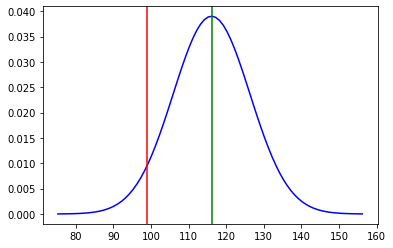

In [63]:
n = 1000
p = 0.1
k = 99
binom_cdf = 0.05

while binom_cdf < binom.cdf(k, n, p):
    n += 1
print(f'При раздаче промокодов в количестве {n} вероятность, не выполнить план меньше {binom.cdf(k, n, p).round(2)*100} %')

# зададим мат.ожидание и ст.отклонение нормального распределения равными
# мат.ожиданию и ст.отклонению биномиального распределения
mu = n * p
sigma = (n * p * (1 - p))**0.5

arange = np.arange((mu - 4 * sigma),(mu + 4 * sigma),1)

plt.plot(arange, st.norm.pdf(arange, mu, sigma), 'b-')
plt.axvline(x=k, color='red')
plt.axvline(x=mu, color='green')
plt.show()

**7.2 Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.**

Вероятность открытия сообщений: 0.15371708296369768


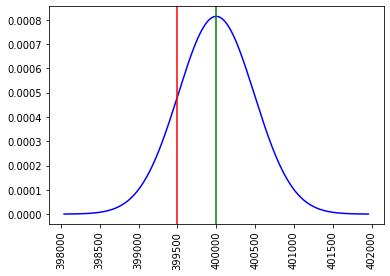

In [64]:
n = 1000000
p = 0.4
k = 399500
# зададим мат.ожидание и ст.отклонение нормального распределения равными
# мат.ожиданию и ст.отклонению биномиального распределения
mu = n * p
sigma = (n * p * (1 - p))**0.5

# задаём нормальное распределение
distr = st.norm(mu, sigma) 

# считаем вероятность хвоста слева от 399.5 тысяч
result = distr.cdf(k)
print('Вероятность открытия сообщений:', result)

arange = np.arange((mu - 4 * sigma),(mu + 4 * sigma),1)
plt.plot(arange, st.norm.pdf(arange, mu, sigma), 'b-')
plt.xticks(rotation=90)
plt.axvline(x=k, color='red')
plt.axvline(x=mu, color='green')
plt.show()

**Вывод:**

В ходе проделанной работы были выполнены следующие пункты:

1. Предобработка данных:

- столбец date приведен к типу даты pandas.
- создан новый столбец с номером месяца на основе столбца date.
- проверено наличие пропущенных значений и дубликатов в датафреймах, а также их обработка.

2. Исследовательский анализ данных

- частота встречаемости городов: чаще всего встречаются люди, проживающие в Пятигорске, реже в Екатеринбурге и Ростове-на-Дону, завершают список люди, проживающие в Москве. Исходя из этих данных, можно сделать вывод, что первенство занимают в основном южные города, исключением является Екатеринбург.
- соотношение пользователей с подпиской и без подписки: людей без подписки больше, чем с ней.
- возраст пользователей: средний возраст потребителя услуги подчиняется нормальному распределению с медианой примерно в 25 лет, при этом средний возраст и медиана практически совпадают.
- расстояние, которое пользователь преодолел за одну поездку: в основном пользователи ездят на дистанции от 3000 метров до 4000 метров
- продолжительность поездок: Распределение напоминает нормальное. В основном продолжительность поездок занимает 20 минут.

3. Объединение данных

- данные о пользователях, поездках и подписках были объеденены в один датафрейм.
- созданы два датафрейма: c данными о пользователях без подписки и с данными о пользователях с подпиской.
- визуализирована информация о расстоянии и времени поездок для пользователей обеих категорий. Разброс по расстоянию у людей с подпиской меньше, чем у людей без нее. Также можно заметить, что наличие подписки влияет на среднее расстояние: с подпиской оно равно `3115.445388`, а без нее - `3045.495282`.

4. Подсчёт выручки

выручка составила `3853677.0` рублей

5.  Проверка гипотез

- Нулевая гипотеза отвергнута, есть основания утверждать, что средняя продолжительность поездки с подпиской больше продолжительности поездок без подписки при установленном уровне значимости в 5 %, хотя на гистограммах, это практически не прослеживается.
- Нулевую гипотезу неудалось отвергнуть и следовательно, есть основания утверждать, что среднее расстояние поездки, пользователей с подпиской, не превышает оптимальное расстоянием в 3130 метров с точки зрения износа самоката, при установленном уровне значимости в 5 %.
- Нулевая гипотеза отвергнута, есть основания утверждать, что средняя месячная выручка от пользователей с подпиской, больше средней месячной выручки от пользователей без подписки, при установленном уровне значимости в 5 %.
- Дано пояснение о необходимости применения метода scipy.stats.ttest_rel(), для сравнения зависимых выборок, удвлетаоряющих условию что, переменная измеряется дважды (количество обращений до обновления и после него) для одних и тех же объектов (пользователь) и имеют одинаковые размеры. При проверке на то что, истинное среднее значение генеральной выборки до изменения больше, чем истинное среднее значение генеральной совокупности после изменения следует указать alternative="less".

6. Распределения

- Необходимо довести до подписчиков как минимум 1161 промокода, для того чтобы как минимум 100 существующих клиентов продлили подписку (продлевают подписку 10% пролучивших промокод) с вероятностью 5% не выполнить план.
- Если разослать 1 млн уведомлени (откроют только 40 % получивших клиентов), тогда вероятность того, что уведомление откроют не более 399,5 тыс. пользователей составит 0.1537 или 15,37 %.

Пользователи с подпиской являются более выгодными клиентами для сервиса аренды самокатов, в связи с этим руководству сервиса желательно принять меры для перехода клиентов на подписку!